In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [28]:
import zipfile

In [24]:
train_data = pd.read_csv('training_mush.csv')

In [9]:
train_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [10]:
X_train = train_data.drop('class', axis=1)
y_train = train_data['class']

In [52]:
archive_password = b'Cool!Move_forward!'
testing_file = zipfile.ZipFile('testing_y_mush.csv.zip').open('testing_y_mush.csv', 'r', archive_password)

In [53]:
X_test = pd.read_csv('testing_mush.csv')
y_true = pd.read_csv(testing_file)

In [6]:
rd = RandomForestClassifier(random_state=0)

In [13]:
parameters = {
    'n_estimators': range(10, 50, 10),
    'max_depth': range(1, 12, 2),
    'min_samples_leaf': range(1, 7),
    'min_samples_split': range(2, 9, 2),
}

In [14]:
gs_rf = GridSearchCV(rd, parameters, cv=3, n_jobs=-1)

In [15]:
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [17]:
best_rf = gs_rf.best_estimator_

In [18]:
feature_importances_df = pd.DataFrame({
    'feature': list(X_train),
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

<AxesSubplot:xlabel='importance', ylabel='feature'>

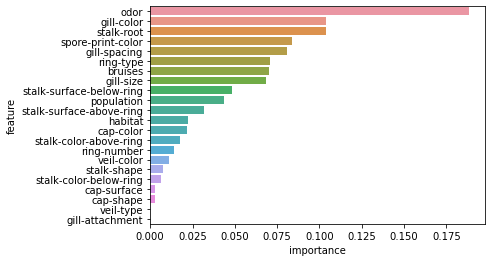

In [22]:
sns.barplot(data=feature_importances_df, x='importance', y='feature', orient='horizontal')

In [23]:
gs_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [54]:
y_pred = best_rf.predict(X_test)

<AxesSubplot:>

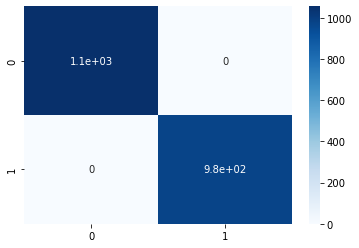

In [58]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')